## Solar Radiation Prediction

In [161]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\DataScience\Assignment-3_optional\SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


Text(0.5, 0.98, 'Temp vs. Radiation')

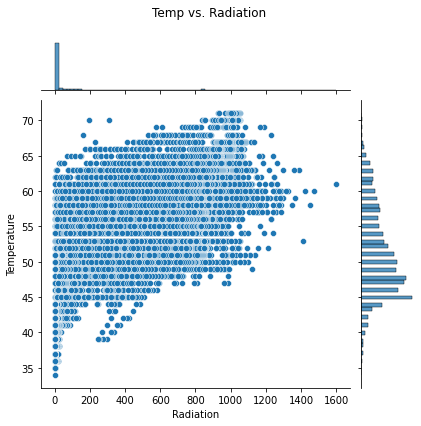

In [162]:
g = sns.jointplot(x="Radiation", y="Temperature", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Radiation')

Text(0.5, 0.98, 'Temp vs. Humidity')

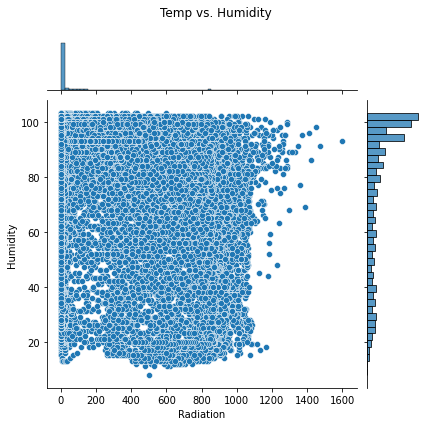

In [163]:
g = sns.jointplot(x="Radiation", y="Humidity", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Humidity')

The above plots represent уelationship between radiation with temperature and humidity.

In [164]:
df = df[df['Radiation'] >= 10]

df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')

df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00,1900-01-01 18:05:22,18,9,2016,12
71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00,1900-01-01 18:00:22,18,9,2016,12
72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00,1900-01-01 17:55:22,17,9,2016,12
73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00,1900-01-01 17:50:19,17,9,2016,12
74,1475207122,9/29/2016 12:00:00 AM,17:45:22,49.57,56,30.44,49,25.72,6.75,06:13:00,18:13:00,1900-01-01 17:45:22,17,9,2016,12


Here we are dropping low radiation values and conver time to_datetime, and add next columns: hour, month, year

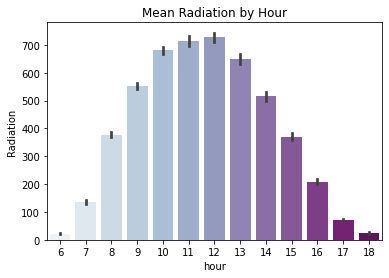

In [165]:
ax = plt.axes()
sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Hour')
plt.show()


Here we can see the level of radiation by hour when its day time (from 6 am to 6 pm). The peak radiation occurs at 12 o'clock in the afternoon, when the sun is most active. 

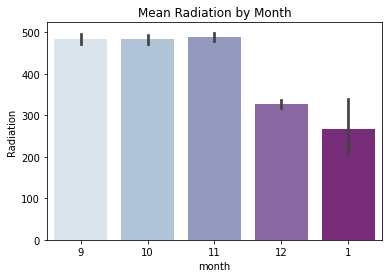

In [166]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

This graph represent average radiation in each consecutive month. As we can see in winter radiation level is lower because the day is more shorter than in autumn.

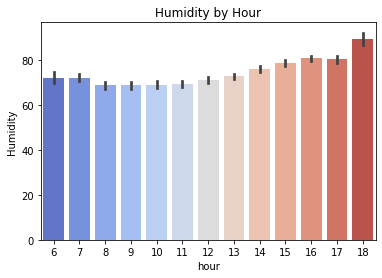

In [167]:
ax = plt.axes()
sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('Humidity by Hour')
plt.show()

Here we can see the relationship between humidity and hour.

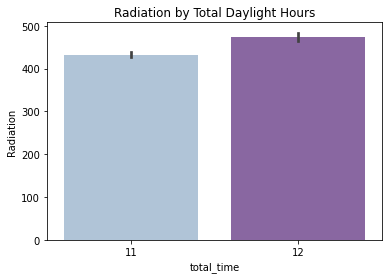

In [168]:
ax = plt.axes()
sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Radiation by Total Daylight Hours')
plt.show()

In [169]:
df['Time'] = pd.to_datetime(df['Time'])
df['Data'] = pd.to_datetime(df['Data'])
date = df['Data']
df['Day'] = df['Data'].apply(lambda date: date.day)
df['Month'] = df['Data'].apply(lambda date: date.month)
df['hour'] = df['Time'].apply(lambda date: date.hour)
solar_sorted = df.pivot_table(index=['Month', 'Day','hour'],values= ['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed'],aggfunc=np.mean)
X = solar_sorted[['Humidity', 'Pressure', 'Speed', 'Temperature', 'WindDirection(Degrees)']]
y = solar_sorted['Radiation']

I am just using two different regression algorithm to check the performance between them. While, the corelation between temperature and Radiation is obvious. So for that a simple linear regression will show favorable rsults. However, we can use a more complicated alogirthm (whcih I am going to use as SVR) to see if non linear relationships can be established between the parameters.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

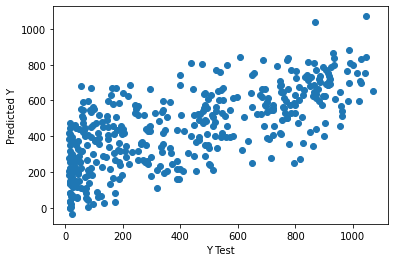

MAE: 193.41332326274545
MSE: 55661.57793989758
RMSE: 235.9270606350564
Regression score: 0.4701070032146174


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

regresor = LinearRegression()
regresor.fit(X_train, y_train)
regresor_pred = regresor.predict(X_test)

plt.scatter(y_test, regresor_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


print('MAE:', metrics.mean_absolute_error(y_test, regresor_pred))
print('MSE:', metrics.mean_squared_error(y_test, regresor_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regresor_pred)))
print('Regression score:', r2_score(y_test, regresor_pred))

MAE: 165.51809844547776
MSE: 48209.222777857605
RMSE: 219.5659872973444
Regression score: 0.541052724771171


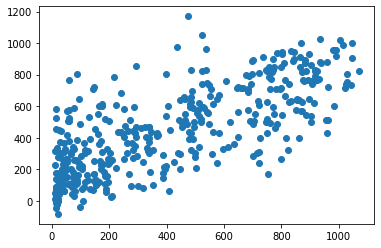

In [171]:
param_grid ={'C':[1000,2500,5000,7500,10000], 'gamma':[0.01,0.001,0.0001], 'kernel':['rbf']} 
from sklearn.svm import SVR

solar_svr2 = SVR(C=2500,gamma=0.001)
solar_svr2.fit(X_train,y_train)
predictions_svr2 = solar_svr2.predict(X_test)
plt.scatter(y_test,predictions_svr2)

print('MAE:', metrics.mean_absolute_error(y_test, predictions_svr2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_svr2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_svr2)))
print('Regression score:', r2_score(y_test, predictions_svr2))

The SVR when optimised, results in a better prediction

The results can be summarised as follows ;

## Linear Regression - RMSE = 235.927 W/m2 and R2 = 0.47 
## SVR(Optimised) - RMSE = 219.566 W/m2 and R2 = 0.541
Or some value similar to this